In [2]:
from fastai.vision.all import *

from PIL import Image
import numpy as np
import pandas as pd
import os
from pathlib import Path

np.random.seed(0)

In [3]:
df_mod = pd.read_csv('../2.4_Modify_Entire_Dataset/mod_df_clipped.csv', index_col = 0)

In [4]:
df_mod.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,magnets,no_mod,bullet,coin
0,CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,True,NaN,NaN,NaN
1,CheXpert-v1.0-small/train/patient00002/study2/view1_frontal.jpg,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,True,NaN,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/view1_frontal.jpg,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,NaN,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/view2_lateral.jpg,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,NaN,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/view1_frontal.jpg,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [5]:
path = Path('../2.4_Modify_Entire_Dataset/CheXpert-v1.0-small-MOD/')

In [6]:
def adjust_path_to_mod(row):
    
    mod_cols = 'coin magnets bullet no_mod'.split(' ')
    
    p  = Path(row['Path'])
    
    mod_option = mod_cols[np.argmax((row[mod_cols] == True).values.ravel())]
    
    p = Path(*p.parts[1:-1])/Path(p.stem + f'_mod_{mod_option}' + p.suffix)
    
    row['Path'] = str(p)
    
    return row


In [9]:
df_mod = df_mod.apply(adjust_path_to_mod, axis = 1)

In [10]:
df_mod.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,...,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices,magnets,no_mod,bullet,coin
0,train/patient00001/study1/view1_frontal_mod_magnets.jpg,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,1.0,True,NaN,NaN,NaN
1,train/patient00002/study2/view1_frontal_mod_no_mod.jpg,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,...,-1.0,NaN,-1.0,NaN,1.0,NaN,NaN,True,NaN,NaN
2,train/patient00002/study1/view1_frontal_mod_no_mod.jpg,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,NaN,NaN
3,train/patient00002/study1/view2_lateral_mod_no_mod.jpg,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,True,NaN,NaN
4,train/patient00003/study1/view1_frontal_mod_bullet.jpg,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN


In [11]:
df_mod.to_csv('df_mod_pathadjusted.csv')

In [12]:
p = df_mod['Path'].iloc[0]

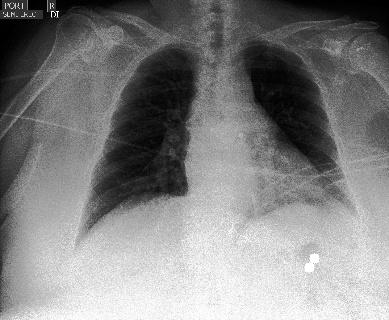

In [15]:
Image.open(path / p)

In [94]:
row = df_mod.sample(1)

In [95]:
mod_cols = 'coin magnets bullet no_mod'.split(' ')

In [96]:
mod_option = mod_cols[np.argmax((row[mod_cols] == True).values.ravel())]